In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

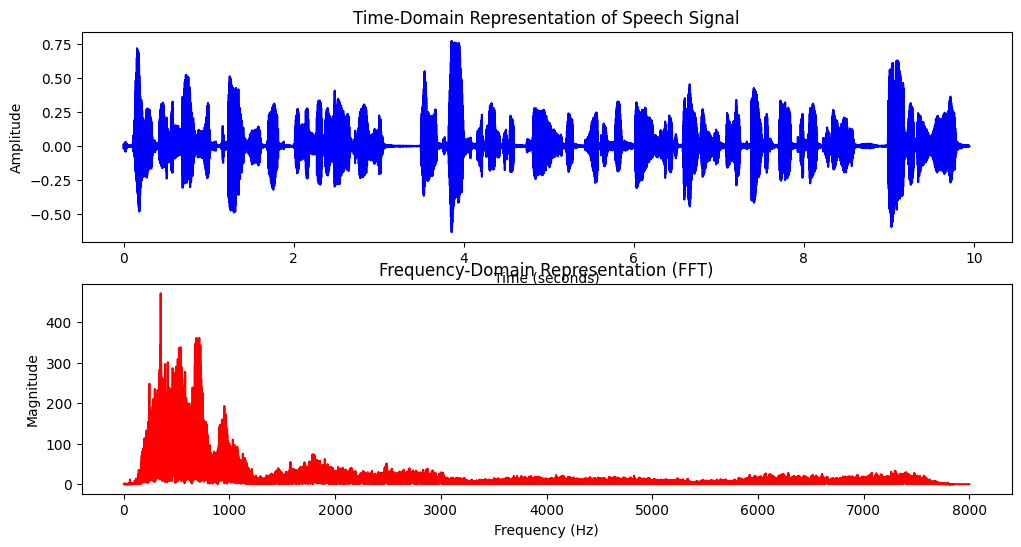

In [2]:
# Load speech signal
y, sr = librosa.load("/content/LJ001-0014.wav", sr=16000)

# Compute FFT
N = len(y)
fft_spectrum = np.fft.fft(y)
freqs = np.fft.fftfreq(N, d=1/sr)

# Compute magnitude spectrum
magnitude = np.abs(fft_spectrum)

# Plot time-domain waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(y)/sr, len(y)), y, color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Representation of Speech Signal")

# Plot frequency-domain representation (FFT)
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], magnitude[:N//2], color="red")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency-Domain Representation (FFT)")

plt.show()

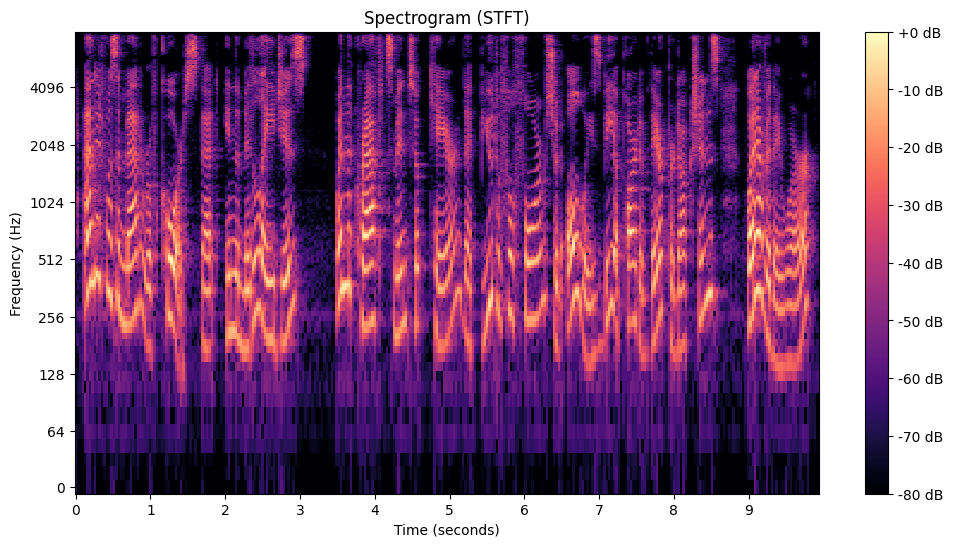

In [3]:
# Compute STFT
D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512))

# Convert amplitude to decibels
D_dB = librosa.amplitude_to_db(D, ref=np.max)

# Plot spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(D_dB, sr=sr, hop_length=512, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (STFT)")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()

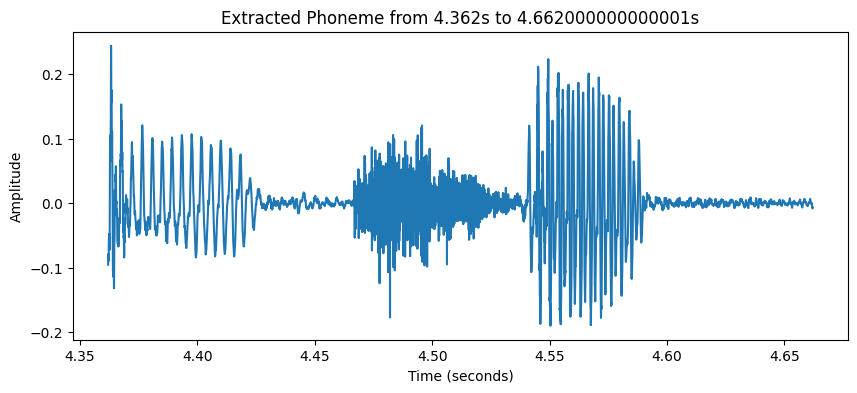

In [4]:
energy = np.sum(np.abs(D) ** 2, axis=0)
peak_frame = np.argmax(energy)
peak_time = peak_frame * (256 / sr)

# Define a time window around the peak energy point
window_size = 0.3
start_time = max(0, peak_time - window_size / 2)
end_time = min(len(y) / sr, peak_time + window_size / 2)
start_sample, end_sample = int(start_time * sr), int(end_time * sr)
phoneme_segment = y[start_sample:end_sample]

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(start_time, end_time, len(phoneme_segment)), phoneme_segment)
plt.title(f"Extracted Phoneme from {start_time}s to {end_time}s")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [5]:
# Define frequency bands
low_freq_band = (300, 3000)  # Vowel range
high_freq_band = (4000, 8000)  # Fricative range

# Compute STFT
D = np.abs(librosa.stft(y, n_fft=1024, hop_length=512))**2
freq_bins = librosa.fft_frequencies(sr=sr, n_fft=1024)

# Extract frequency indices
low_idx = np.where((freq_bins >= low_freq_band[0]) & (freq_bins <= low_freq_band[1]))[0]
high_idx = np.where((freq_bins >= high_freq_band[0]) & (freq_bins <= high_freq_band[1]))[0]

# Compute total energy in each band
low_energy = np.sum(D[low_idx, :])
high_energy = np.sum(D[high_idx, :])

# Compute energy ratio (vowels vs fricatives)
energy_ratio = low_energy / high_energy if high_energy != 0 else 0

print(f"Energy in Vowel Range (300-3000 Hz): {low_energy:.2f}")
print(f"Energy in Fricative Range (4000-8000 Hz): {high_energy:.2f}")
print(f"Vowel-to-Fricative Energy Ratio: {energy_ratio:.2f}")

Energy in Vowel Range (300-3000 Hz): 432981.47
Energy in Fricative Range (4000-8000 Hz): 10243.68
Vowel-to-Fricative Energy Ratio: 42.27
